<a href="https://colab.research.google.com/github/andrecastrogarciams/ProjectWeb/blob/main/AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Preparando Dados

In [15]:
#Nomeando as lojas
loja1['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

In [16]:
# Concatena todas as lojas
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [17]:
# Converte coluna de data para datetime
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True, errors='coerce')

In [18]:
# Definição de colunas de interesse
valor_col   = 'Preço'
frete_col   = 'Frete'
cat_col     = 'Categoria do Produto'
produto_col = 'Produto'
aval_col    = 'Avaliação da compra'
data_col    = 'Data da Compra'

#1. Análise do faturamento


## 1.1 Faturamento total por loja (gráfico de barras)

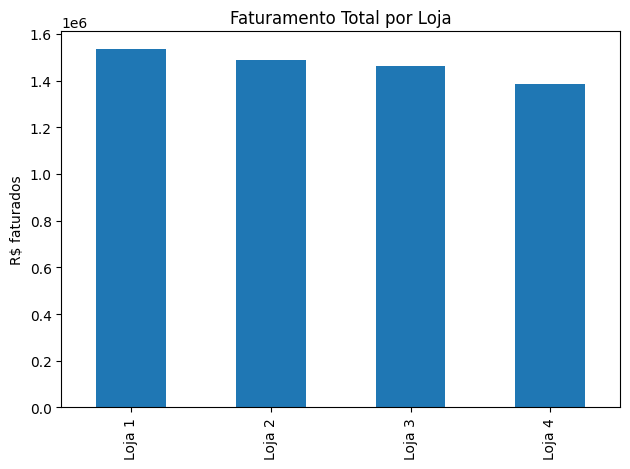

In [19]:
fat_loja = df.groupby('loja')[valor_col].sum().sort_values(ascending=False)
plt.figure()
fat_loja.plot(kind='bar')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$ faturados')
plt.xlabel('')
plt.tight_layout()
plt.show()

# 1.2 Faturamento mensal agregado

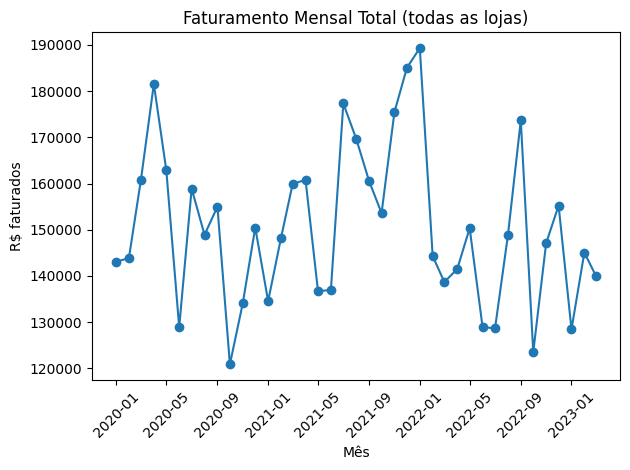

In [20]:
df['mes'] = df[data_col].dt.to_period('M').dt.to_timestamp()
fat_mensal = df.groupby('mes')[valor_col].sum().sort_index()
plt.figure()
plt.plot(fat_mensal.index, fat_mensal.values, marker='o')
plt.title('Faturamento Mensal Total (todas as lojas)')
plt.xlabel('Mês')
plt.ylabel('R$ faturados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
